# BOSTON HOUSE DATASET--LINEAR REGRESSION

EDA PROCESS BOSTON DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


In [2]:
boston=pd.read_csv('Boston dataset.csv')

boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
boston.rename(columns={'MEDV':'TARGET'},inplace= True)


In [5]:
boston.shape

(506, 14)

In [6]:
boston.TARGET

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: TARGET, Length: 506, dtype: float64

In [7]:
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
TARGET      0
dtype: int64

<Axes: >

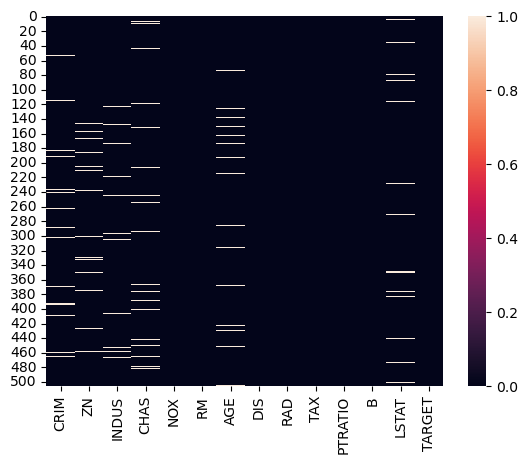

In [8]:
sns.heatmap(boston.isnull())

In [9]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
boston.skew()

CRIM       5.212843
ZN         2.256613
INDUS      0.303722
CHAS       3.382293
NOX        0.729308
RM         0.403612
AGE       -0.582470
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.908892
TARGET     1.108098
dtype: float64

<Axes: ylabel='Frequency'>

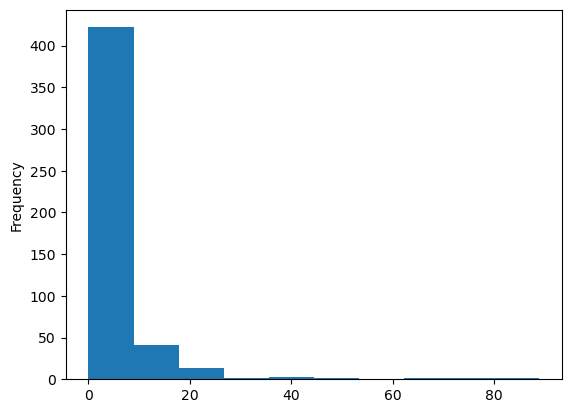

In [11]:
boston['CRIM'].plot.hist() #rightskewed data

Remove the Skewness

In [12]:
# we have 2 process 
#Process: 1

#boston['CRIM']=np.log(boston['CRIM'])
#boston['CRIM'].plot.hist()

<Axes: ylabel='Frequency'>

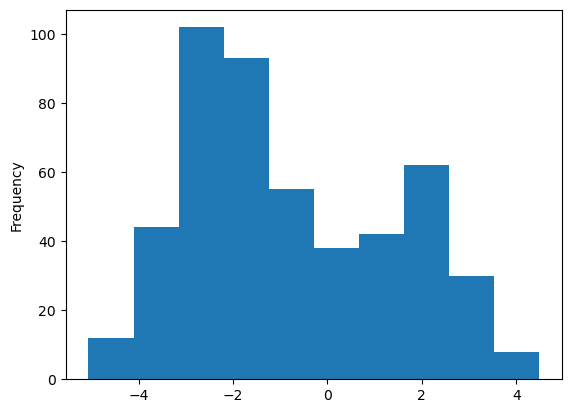

In [13]:
#Process:2
from scipy.stats import boxcox
# 0 -> log transform
#0.5 -> square root transform
boston['CRIM']=boxcox(boston['CRIM'],0)
boston['CRIM'].plot.hist()

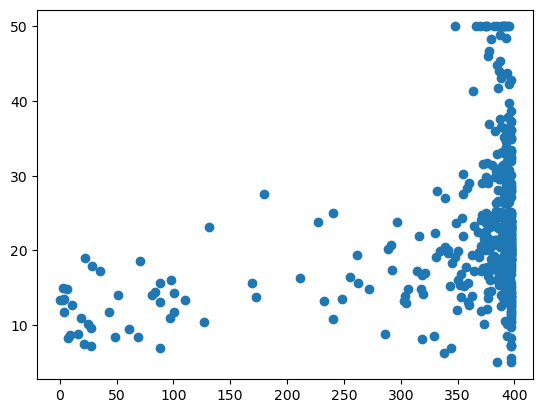

In [14]:
plt.scatter(boston['B'],boston['TARGET'])

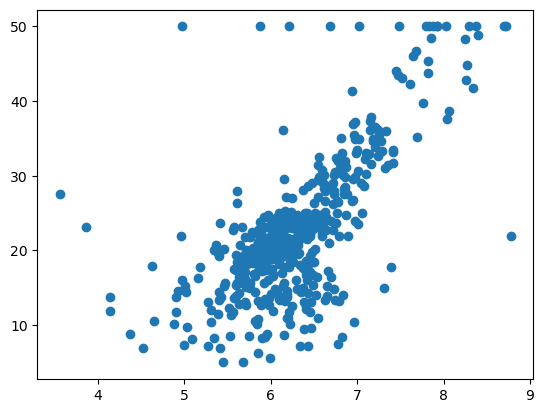

In [15]:
x=boston['RM']
y=boston['TARGET']
plt.scatter(x,y)
plt.show() #positive correlation is there

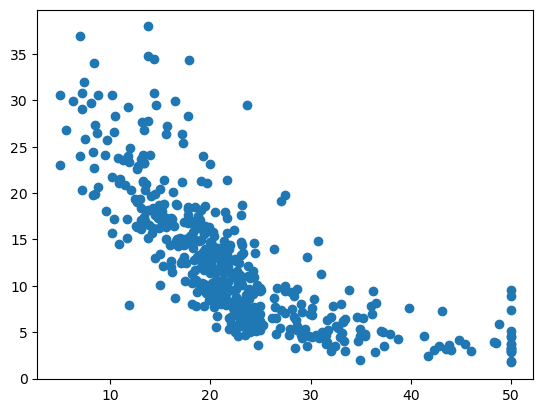

In [16]:
plt.scatter(boston['TARGET'],boston['LSTAT'])
plt.show() #negative correlation is there

<Axes: >

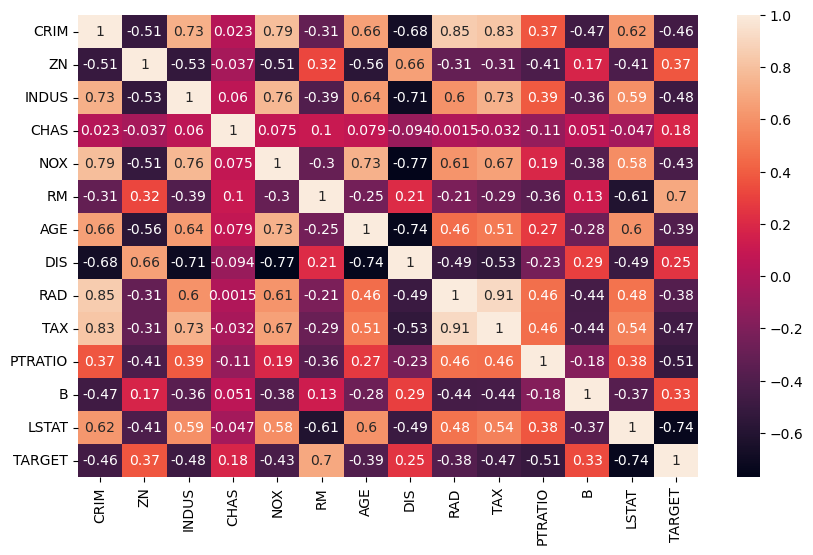

In [17]:
boston_cor=boston.corr()
plt.figure(figsize=(10,6))
sns.heatmap(boston_cor,annot=True)


In [18]:
#drop the LSTAT
boston.drop('LSTAT',axis=1,inplace=True)

In [19]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,TARGET
0,-5.064036,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,24.0
1,-3.600502,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,21.6
2,-3.601235,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,34.7
3,-3.430523,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,33.4
4,-2.672924,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,36.2


In [20]:
boston.shape

(506, 13)

<Axes: >

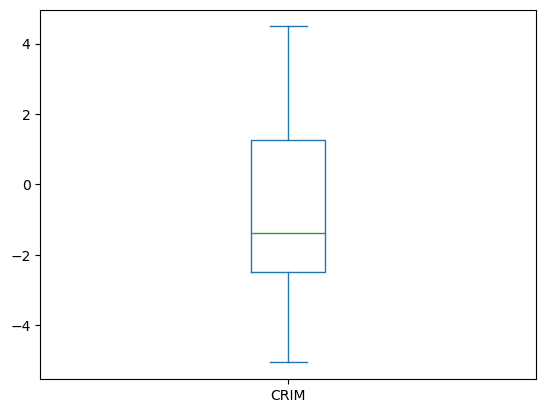

In [21]:
boston['CRIM'].plot.box()

<Axes: >

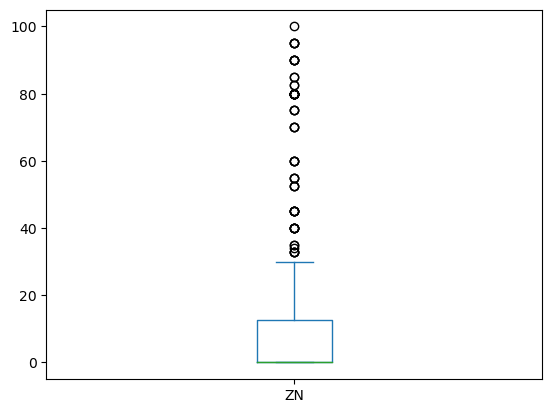

In [22]:
boston['ZN'].plot.box()

CRIM          Axes(0.125,0.53;0.0945122x0.35)
ZN         Axes(0.238415,0.53;0.0945122x0.35)
INDUS      Axes(0.351829,0.53;0.0945122x0.35)
CHAS       Axes(0.465244,0.53;0.0945122x0.35)
NOX        Axes(0.578659,0.53;0.0945122x0.35)
RM         Axes(0.692073,0.53;0.0945122x0.35)
AGE        Axes(0.805488,0.53;0.0945122x0.35)
DIS           Axes(0.125,0.11;0.0945122x0.35)
RAD        Axes(0.238415,0.11;0.0945122x0.35)
TAX        Axes(0.351829,0.11;0.0945122x0.35)
PTRATIO    Axes(0.465244,0.11;0.0945122x0.35)
B          Axes(0.578659,0.11;0.0945122x0.35)
TARGET     Axes(0.692073,0.11;0.0945122x0.35)
dtype: object

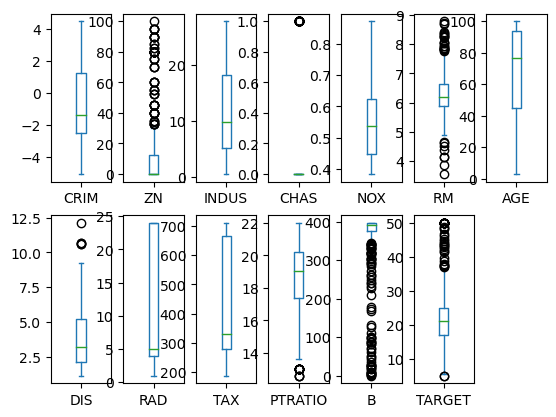

In [23]:
boston.plot(kind='box',subplots=True,layout=(2,7))

In [24]:
#removing outliers

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(boston))

z

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,TARGET
0,NaN,NaN,NaN,NaN,0.144217,0.413672,NaN,0.140214,0.982843,0.666608,1.459000,0.441052,0.159686
1,NaN,NaN,NaN,NaN,0.740262,0.194274,NaN,0.557160,0.867883,0.987329,0.303094,0.441052,0.101524
2,NaN,NaN,NaN,NaN,0.740262,1.282714,NaN,0.557160,0.867883,0.987329,0.303094,0.396427,1.324247
3,NaN,NaN,NaN,NaN,0.835284,1.016303,NaN,1.077737,0.752922,1.106115,0.113032,0.416163,1.182758
4,NaN,NaN,NaN,NaN,0.835284,1.228577,NaN,1.077737,0.752922,1.106115,0.113032,0.441052,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,NaN,0.158124,0.439316,NaN,0.625796,0.982843,0.803212,1.176466,0.387217,0.014454
502,NaN,NaN,NaN,NaN,0.158124,0.234548,NaN,0.716639,0.982843,0.803212,1.176466,0.441052,0.210362
503,NaN,NaN,NaN,NaN,0.158124,0.984960,NaN,0.773684,0.982843,0.803212,1.176466,0.441052,0.148802
504,NaN,NaN,NaN,NaN,0.158124,0.725672,NaN,0.668437,0.982843,0.803212,1.176466,0.403225,0.057989


In [26]:
thresold=3
print (np.where(z>3))

(array([102, 225, 257, 262, 351, 352, 353, 354, 355, 364, 365, 367, 374,
       406, 410, 411, 412, 415, 416, 418, 419, 423, 424, 425, 426, 427,
       429, 431, 436, 437, 438, 445, 450, 454, 455, 456, 457, 466],
      dtype=int64), array([11,  5,  5,  5,  7,  7,  7,  7,  7,  5,  5,  5,  5,  5, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11], dtype=int64))
